In [1]:
import networkx as nx
import pandas as pd
import scipy.stats as stats
import matplotlib
import numpy as np

In [2]:
dataPath = "data/atp_matches_2020.csv"

data = pd.read_csv(dataPath) 
print(data)

                            tourney_id                  tourney_name surface  \
0                            2020-8888                       Atp Cup    Hard   
1                            2020-8888                       Atp Cup    Hard   
2                            2020-8888                       Atp Cup    Hard   
3                            2020-8888                       Atp Cup    Hard   
4                            2020-8888                       Atp Cup    Hard   
...                                ...                           ...     ...   
1442  2020-M-DC-2020-WG2-PO-POL-HKG-01  Davis Cup WG2 PO: POL vs HKG    Hard   
1443  2020-M-DC-2020-WG2-PO-POL-HKG-01  Davis Cup WG2 PO: POL vs HKG    Hard   
1444  2020-M-DC-2020-WG2-PO-SYR-ZIM-01  Davis Cup WG2 PO: SYR vs ZIM    Hard   
1445  2020-M-DC-2020-WG2-PO-SYR-ZIM-01  Davis Cup WG2 PO: SYR vs ZIM    Hard   
1446  2020-M-DC-2020-WG2-PO-SYR-ZIM-01  Davis Cup WG2 PO: SYR vs ZIM    Hard   

      draw_size tourney_level  tourney_

In [3]:
import pickle

with open("data/data_cleaned_2019", 'wb') as file:
    pickle.dump(data, file)

In [4]:
import pickle

with open("data/data_cleaned_2019", 'rb') as file:
    data = pickle.load(file)

In [5]:
list_winner = set(data['winner_name'].unique())
list_looser = set(data['loser_name'].unique())

skup_id = list_winner.union(list_looser)
print(f"Postoji { len(skup_id) } različitih igrača") # formatiranje ispisa pomoću fstringa

Postoji 345 različitih igrača


In [6]:
import numpy as np
import matplotlib.pyplot as plt

data['id'] = data.index

data_reduced = data[['winner_name', 'loser_name', 'winner_rank','loser_rank', 'winner_ioc', 'loser_ioc', 'id' ]]
print(data_reduced)

                winner_name                  loser_name  winner_rank  \
0            Novak Djokovic                Rafael Nadal          2.0   
1     Roberto Bautista Agut               Dusan Lajovic         10.0   
2            Novak Djokovic             Daniil Medvedev          2.0   
3             Dusan Lajovic             Karen Khachanov         34.0   
4              Rafael Nadal              Alex De Minaur          1.0   
...                     ...                         ...          ...   
1442         Jerzy Janowicz              Pak Long Yeung        461.0   
1443       Maks Kasnikowski                  Wai Yu Kai          NaN   
1444              Hazem Naw  Mehluli Don Ayanda Sibanda          NaN   
1445          Benjamin Lock                   Amer Naow        430.0   
1446          Benjamin Lock                   Hazem Naw        430.0   

      loser_rank winner_ioc loser_ioc    id  
0            1.0        SRB       ESP     0  
1           34.0        ESP       SRB     1

In [7]:
list_nations = []
for i in skup_id:
    print(i)
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_ioc']
        list_nations.append((result.iloc[0]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_ioc']
        list_nations.append((result.iloc[0]))
    print(list_nations)

Finn Tearney
['NZL']
Phuong Van Nguyen
['NZL', 'VIE']
Denis Shapovalov
['NZL', 'VIE', 'CAN']
Nicolas Alvarez
['NZL', 'VIE', 'CAN', 'PER']
Luis David Martinez
['NZL', 'VIE', 'CAN', 'PER', 'VEN']
Michail Pervolarakis
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP']
Timofey Skatov
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS']
Francisco Cerundolo
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG']
Borna Coric
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO']
Miomir Kecmanovic
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB']
Sumit Nagal
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND']
Nicolas Jarry
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND', 'CHI']
Grigor Dimitrov
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND', 'CHI', 'BUL']
Christopher Eubanks
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND', 'CHI', 'BUL', 'USA']
Sharmal Dissanayake

['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND', 'CHI', 'BUL', 'USA', 'SRI', 'SRI', 'CRO', 'ESP', 'GER', 'EST', 'TUR', 'BRA', 'BIH', 'GUA', 'USA', 'ESP', 'AUT', 'ARG', 'NOR', 'NED', 'AUS', 'VEN', 'HKG', 'ARG', 'USA', 'AUS', 'NED', 'RSA', 'ITA', 'KAZ', 'USA', 'AUS', 'JPN', 'GER', 'SUI', 'RUS', 'SUI', 'POL', 'ESP', 'USA', 'JPN', 'NOR', 'UZB', 'FIN', 'FRA', 'AUS', 'VIE', 'ESP', 'CAN', 'FRA', 'FRA', 'DEN', 'GER', 'ESP', 'CRO', 'ITA', 'GBR', 'GER', 'CAN', 'ARG', 'SVK', 'USA', 'ARG', 'UKR', 'TPE', 'SUI', 'FRA', 'FRA', 'BUL', 'KAZ', 'USA', 'MEX', 'SRI', 'MDA', 'ITA', 'FRA', 'USA']
Daniil Glinka
['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND', 'CHI', 'BUL', 'USA', 'SRI', 'SRI', 'CRO', 'ESP', 'GER', 'EST', 'TUR', 'BRA', 'BIH', 'GUA', 'USA', 'ESP', 'AUT', 'ARG', 'NOR', 'NED', 'AUS', 'VEN', 'HKG', 'ARG', 'USA', 'AUS', 'NED', 'RSA', 'ITA', 'KAZ', 'USA', 'AUS', 'JPN', 'GER', 'SUI', 'RUS', 'SUI', 'POL', 'ESP', 'USA', 'JPN', 'NOR', 'UZB', 'FIN

['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND', 'CHI', 'BUL', 'USA', 'SRI', 'SRI', 'CRO', 'ESP', 'GER', 'EST', 'TUR', 'BRA', 'BIH', 'GUA', 'USA', 'ESP', 'AUT', 'ARG', 'NOR', 'NED', 'AUS', 'VEN', 'HKG', 'ARG', 'USA', 'AUS', 'NED', 'RSA', 'ITA', 'KAZ', 'USA', 'AUS', 'JPN', 'GER', 'SUI', 'RUS', 'SUI', 'POL', 'ESP', 'USA', 'JPN', 'NOR', 'UZB', 'FIN', 'FRA', 'AUS', 'VIE', 'ESP', 'CAN', 'FRA', 'FRA', 'DEN', 'GER', 'ESP', 'CRO', 'ITA', 'GBR', 'GER', 'CAN', 'ARG', 'SVK', 'USA', 'ARG', 'UKR', 'TPE', 'SUI', 'FRA', 'FRA', 'BUL', 'KAZ', 'USA', 'MEX', 'SRI', 'MDA', 'ITA', 'FRA', 'USA', 'EST', 'ISR', 'USA', 'ARG', 'IND', 'CHI', 'USA', 'USA', 'CZE', 'CHI', 'ITA', 'POL', 'GER', 'ARG', 'USA', 'RUS', 'LTU', 'UKR', 'GER', 'CAN', 'ITA', 'SRB', 'THA', 'SUI', 'PUR', 'ESP', 'SVK', 'USA', 'IND', 'ITA', 'SWE', 'GEO', 'FRA', 'SRB', 'NZL', 'PHI', 'POL', 'ITA', 'ISR', 'VEN', 'UKR', 'BOL', 'EGY', 'SLO', 'BRA', 'CZE', 'IND', 'LTU', 'MDA', 'POL', 'TUN', 'GER', 'BUL', 'FRA', 'KEN', 'USA'

['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND', 'CHI', 'BUL', 'USA', 'SRI', 'SRI', 'CRO', 'ESP', 'GER', 'EST', 'TUR', 'BRA', 'BIH', 'GUA', 'USA', 'ESP', 'AUT', 'ARG', 'NOR', 'NED', 'AUS', 'VEN', 'HKG', 'ARG', 'USA', 'AUS', 'NED', 'RSA', 'ITA', 'KAZ', 'USA', 'AUS', 'JPN', 'GER', 'SUI', 'RUS', 'SUI', 'POL', 'ESP', 'USA', 'JPN', 'NOR', 'UZB', 'FIN', 'FRA', 'AUS', 'VIE', 'ESP', 'CAN', 'FRA', 'FRA', 'DEN', 'GER', 'ESP', 'CRO', 'ITA', 'GBR', 'GER', 'CAN', 'ARG', 'SVK', 'USA', 'ARG', 'UKR', 'TPE', 'SUI', 'FRA', 'FRA', 'BUL', 'KAZ', 'USA', 'MEX', 'SRI', 'MDA', 'ITA', 'FRA', 'USA', 'EST', 'ISR', 'USA', 'ARG', 'IND', 'CHI', 'USA', 'USA', 'CZE', 'CHI', 'ITA', 'POL', 'GER', 'ARG', 'USA', 'RUS', 'LTU', 'UKR', 'GER', 'CAN', 'ITA', 'SRB', 'THA', 'SUI', 'PUR', 'ESP', 'SVK', 'USA', 'IND', 'ITA', 'SWE', 'GEO', 'FRA', 'SRB', 'NZL', 'PHI', 'POL', 'ITA', 'ISR', 'VEN', 'UKR', 'BOL', 'EGY', 'SLO', 'BRA', 'CZE', 'IND', 'LTU', 'MDA', 'POL', 'TUN', 'GER', 'BUL', 'FRA', 'KEN', 'USA'

['NZL', 'VIE', 'CAN', 'PER', 'VEN', 'CYP', 'RUS', 'ARG', 'CRO', 'SRB', 'IND', 'CHI', 'BUL', 'USA', 'SRI', 'SRI', 'CRO', 'ESP', 'GER', 'EST', 'TUR', 'BRA', 'BIH', 'GUA', 'USA', 'ESP', 'AUT', 'ARG', 'NOR', 'NED', 'AUS', 'VEN', 'HKG', 'ARG', 'USA', 'AUS', 'NED', 'RSA', 'ITA', 'KAZ', 'USA', 'AUS', 'JPN', 'GER', 'SUI', 'RUS', 'SUI', 'POL', 'ESP', 'USA', 'JPN', 'NOR', 'UZB', 'FIN', 'FRA', 'AUS', 'VIE', 'ESP', 'CAN', 'FRA', 'FRA', 'DEN', 'GER', 'ESP', 'CRO', 'ITA', 'GBR', 'GER', 'CAN', 'ARG', 'SVK', 'USA', 'ARG', 'UKR', 'TPE', 'SUI', 'FRA', 'FRA', 'BUL', 'KAZ', 'USA', 'MEX', 'SRI', 'MDA', 'ITA', 'FRA', 'USA', 'EST', 'ISR', 'USA', 'ARG', 'IND', 'CHI', 'USA', 'USA', 'CZE', 'CHI', 'ITA', 'POL', 'GER', 'ARG', 'USA', 'RUS', 'LTU', 'UKR', 'GER', 'CAN', 'ITA', 'SRB', 'THA', 'SUI', 'PUR', 'ESP', 'SVK', 'USA', 'IND', 'ITA', 'SWE', 'GEO', 'FRA', 'SRB', 'NZL', 'PHI', 'POL', 'ITA', 'ISR', 'VEN', 'UKR', 'BOL', 'EGY', 'SLO', 'BRA', 'CZE', 'IND', 'LTU', 'MDA', 'POL', 'TUN', 'GER', 'BUL', 'FRA', 'KEN', 'USA'

In [8]:
list_rank_points = []
for i in skup_id:
    print(i)
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_rank_points']
        list_rank_points.append((result.iloc[-1]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_rank_points']
        list_rank_points.append((result.iloc[-1]))
for i in range(len(list_rank_points)):
        if(np.isnan(list_rank_points[i])):
            list_rank_points[i] = 0
for i in range(0, len(list_rank_points)): 
    list_rank_points[i] = int(list_rank_points[i])

Finn Tearney
Phuong Van Nguyen
Denis Shapovalov
Nicolas Alvarez
Luis David Martinez
Michail Pervolarakis
Timofey Skatov
Francisco Cerundolo
Borna Coric
Miomir Kecmanovic
Sumit Nagal
Nicolas Jarry
Grigor Dimitrov
Christopher Eubanks
Sharmal Dissanayake
Thehan Sanjaya Wijemanne
Nino Serdarusic
Albert Ramos
Cedrik Marcel Stebe
Kristjan Tamm
Cem Ilkel
Felipe Meligeni Rodrigues Alves
Mirza Basic
Franz Luna Lavidalie
Reilly Opelka
Jaume Munar
Jurij Rodionov
Juan Ignacio Londero
Casper Ruud
Robin Haase
James Duckworth
Jordi Munoz Abreu
Pak Long Yeung
Marco Trungelliti
Denis Kudla
John Patrick Smith
Tallon Griekspoor
Ruan Roelofse
Fabio Fognini
Mikhail Kukushkin
Bradley Klahn
Bernard Tomic
Go Soeda
Benjamin Hassan
Stan Wawrinka
Karen Khachanov
Marc Andrea Huesler
Kacper Zuk
Fernando Verdasco
Noah Rubin
Yuichi Sugita
Lukas Hellum Lilleengen
Denis Istomin
Otto Virtanen
Maxime Janvier
Aleksandar Vukic
Linh Giang Trinh
Feliciano Lopez
Milos Raonic
Maxime Cressy
Arthur Rinderknech
Holger Rune
Peter

In [9]:
list_rank = []
for i in skup_id:
    if(len(data[(data['winner_name'] == i)]) > 0):
        result = data[(data['winner_name'] == i)]['winner_rank']
        list_rank.append((result.iloc[-1]))
    elif(len(data[(data['loser_name'] == i)]) > 0):
        result = data[(data['loser_name'] == i)]['loser_rank']
        list_rank.append((result.iloc[-1]))
for i in range(len(list_rank)):
        if(np.isnan(list_rank[i])):
            list_rank[i] = 0

for i in range(0, len(list_rank)): 
    list_rank[i] = int(list_rank[i])

In [10]:
G = nx.Graph() # pravi praznu mrežu
for i in range(len(skup_id)):
    G.add_node(list(skup_id)[i], ioc = list_nations[i], rankpoints = list_rank_points[i], rank = list_rank[i] ) # dodaje čvorove čije su labele u "skup_id"

In [11]:
for _, winner_name, loser_name, winner_rank, loser_rank, winner_ioc, loser_ioc, _  in data_reduced.itertuples():
    if (winner_name, loser_name) in G.edges:
        G.edges[winner_name, loser_name]['weight'] += 1
    else:
        G.add_edge(winner_name, loser_name, weight=1)

In [12]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 345
Number of edges: 1325
Average degree:   7.6812


In [13]:
G.nodes.data()

NodeDataView({'Finn Tearney': {'ioc': 'NZL', 'rankpoints': 9, 'rank': 1018}, 'Phuong Van Nguyen': {'ioc': 'VIE', 'rankpoints': 0, 'rank': 0}, 'Denis Shapovalov': {'ioc': 'CAN', 'rankpoints': 2695, 'rank': 12}, 'Nicolas Alvarez': {'ioc': 'PER', 'rankpoints': 119, 'rank': 330}, 'Luis David Martinez': {'ioc': 'VEN', 'rankpoints': 0, 'rank': 0}, 'Michail Pervolarakis': {'ioc': 'CYP', 'rankpoints': 62, 'rank': 486}, 'Timofey Skatov': {'ioc': 'RUS', 'rankpoints': 82, 'rank': 438}, 'Francisco Cerundolo': {'ioc': 'ARG', 'rankpoints': 197, 'rank': 239}, 'Borna Coric': {'ioc': 'CRO', 'rankpoints': 1820, 'rank': 24}, 'Miomir Kecmanovic': {'ioc': 'SRB', 'rankpoints': 1283, 'rank': 42}, 'Sumit Nagal': {'ioc': 'IND', 'rankpoints': 448, 'rank': 124}, 'Nicolas Jarry': {'ioc': 'CHI', 'rankpoints': 675, 'rank': 77}, 'Grigor Dimitrov': {'ioc': 'BUL', 'rankpoints': 2215, 'rank': 20}, 'Christopher Eubanks': {'ioc': 'USA', 'rankpoints': 215, 'rank': 221}, 'Sharmal Dissanayake': {'ioc': 'SRI', 'rankpoints': 

In [14]:
output_path = "models/undirected_2020_country_rank.gml"

nx.write_gml(G, output_path)

In [15]:
data_average = data[['winner_name', 'loser_name', 'tourney_id']]
print(data_average)

                winner_name                  loser_name  \
0            Novak Djokovic                Rafael Nadal   
1     Roberto Bautista Agut               Dusan Lajovic   
2            Novak Djokovic             Daniil Medvedev   
3             Dusan Lajovic             Karen Khachanov   
4              Rafael Nadal              Alex De Minaur   
...                     ...                         ...   
1442         Jerzy Janowicz              Pak Long Yeung   
1443       Maks Kasnikowski                  Wai Yu Kai   
1444              Hazem Naw  Mehluli Don Ayanda Sibanda   
1445          Benjamin Lock                   Amer Naow   
1446          Benjamin Lock                   Hazem Naw   

                            tourney_id  
0                            2020-8888  
1                            2020-8888  
2                            2020-8888  
3                            2020-8888  
4                            2020-8888  
...                                ...  
1442

In [16]:
list_winner = set(data['winner_name'].unique())
list_looser = set(data['loser_name'].unique())
list_tournament = set(data['tourney_id'].unique())

skup_id_turnir = list_winner.union(list_looser)
skup_id_turnir = skup_id_turnir.union(list_tournament)
print(f"Postoji { len(skup_id_turnir) } različitih igrača") # formatiranje ispisa pomoću fstring
print(skup_id_turnir)

Postoji 412 različitih igrača
{'Finn Tearney', 'Sebastian Ofner', 'Phuong Van Nguyen', '2020-M-DC-2020-WG1-PO-PAK-SLO-01', 'Denis Shapovalov', 'Nicolas Alvarez', 'Alexei Popyrin', '2020-0568', 'Luis David Martinez', 'Michail Pervolarakis', 'Timofey Skatov', 'Francisco Cerundolo', 'Borna Coric', 'Miomir Kecmanovic', 'Filip Krajinovic', 'Ilya Ivashka', 'John Millman', 'Sumit Nagal', 'Andrew Harris', 'Mehluli Don Ayanda Sibanda', '2020-0495', 'Jesse Flores', 'Nicolas Jarry', '2020-0891', 'Vasek Pospisil', 'Grigor Dimitrov', 'Christopher Eubanks', 'Sharmal Dissanayake', 'Rafael Nadal', 'Martin Cuevas', 'Lorenzo Sonego', 'Thehan Sanjaya Wijemanne', 'Nino Serdarusic', 'Nikoloz Davlianidze', 'Elias Ymer', '2020-M-DC-2020-WG1-PO-LTU-POR-01', 'Albert Ramos', 'Cedrik Marcel Stebe', 'Kristjan Tamm', 'Carlos Alcaraz Garfia', 'Cem Ilkel', 'Felipe Meligeni Rodrigues Alves', 'Mirza Basic', 'Aissa Benchakroun', 'Franz Luna Lavidalie', 'Juan Pablo Varillas', 'Pablo Andujar', 'Reilly Opelka', 'Jaume Mun

In [17]:
M = nx.Graph() # pravi praznu mrežu
M.add_nodes_from(skup_id_turnir) # dodaje čvorove čije su labele u "skup_id"

In [18]:
for _, winner_name, loser_name , tourney_id in data_average.itertuples():
    if (winner_name, tourney_id) in M.edges:
        M.edges[winner_name, tourney_id]['weight'] += 1
    else:
        M.add_edge(winner_name, tourney_id, weight=1)
    if (loser_name, tourney_id) in M.edges:
        M.edges[loser_name, tourney_id]['weight'] += 1
    else:
        M.add_edge(loser_name, tourney_id, weight=1)

In [19]:
print(M.edges.data("weight"))

[('Finn Tearney', '2020-M-DC-2020-WG1-PO-VEN-NZL-01', 1), ('Sebastian Ofner', '2020-0319', 2), ('Phuong Van Nguyen', '2020-M-DC-2020-WG2-PO-MAR-VIE-01', 1), ('2020-M-DC-2020-WG1-PO-PAK-SLO-01', 'Aisam Ul Haq Qureshi', 1), ('2020-M-DC-2020-WG1-PO-PAK-SLO-01', 'Nik Razborsek', 1), ('2020-M-DC-2020-WG1-PO-PAK-SLO-01', 'Aqeel Khan', 1), ('2020-M-DC-2020-WG1-PO-PAK-SLO-01', 'Blaz Kavcic', 1), ('Denis Shapovalov', '2020-8888', 4), ('Denis Shapovalov', '2020-0301', 2), ('Denis Shapovalov', '2020-580', 1), ('Denis Shapovalov', '2020-0375', 1), ('Denis Shapovalov', '2020-0407', 1), ('Denis Shapovalov', '2020-0496', 2), ('Denis Shapovalov', '2020-M024', 2), ('Denis Shapovalov', '2020-560', 5), ('Denis Shapovalov', '2020-M009', 5), ('Denis Shapovalov', '2020-520', 2), ('Denis Shapovalov', '2020-0568', 4), ('Denis Shapovalov', '2020-9406', 1), ('Denis Shapovalov', '2020-0337', 1), ('Denis Shapovalov', '2020-7434', 1), ('Nicolas Alvarez', '2020-M-DC-2020-WG1-PO-PER-SUI-01', 1), ('Alexei Popyrin', '

In [20]:
output_path = "models/undirected_average_model_2020.gml"

nx.write_gml(M, output_path)

In [31]:
ER = nx.erdos_renyi_graph(len(skup_id), 0.022)
print(nx.info(ER))

Name: 
Type: Graph
Number of nodes: 345
Number of edges: 1331
Average degree:   7.7159


In [25]:
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 345
Number of edges: 1325
Average degree:   7.6812


In [32]:
print(nx.average_shortest_path_length(ER))

3.0759521402089653


In [33]:
for g in nx.connected_component_subgraphs(G): 
    print(nx.average_shortest_path_length(g))
    print(nx.info(g))

3.1871543091055288
Name: 
Type: Graph
Number of nodes: 287
Number of edges: 1291
Average degree:   8.9965
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.6666666666666667
Name: 
Type: Graph
Number of nodes: 4
Number of edges: 3
Average degree:   1.5000
2.0
Name: 
Type: Graph
Number of nodes: 5
Number of edges: 4
Average degree:   1.6000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.3333333333333333
Name: 
Type: Graph
Number of nodes: 3
Number of edges: 2
Average degree:   1.3333
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0
Name: 
Type: Graph
Number of nodes: 2
Number of edges: 1
Average degree:   1.0000
1.0


In [34]:
Duzina = 3.1871543091055288/3.0759521402089653
Duzina

1.0361521128508224

In [35]:
import networkx.algorithms.approximation
ccER = nx.algorithms.approximation.clustering_coefficient.average_clustering(ER)
ccG = nx.algorithms.approximation.clustering_coefficient.average_clustering(G)

ccG/ccER

6.2142857142857135

### Novak Djokovic

Čvorovi ego mreže igrača crraii su ['Kevin Anderson', 'Denis Shapovalov', 'Pablo Carreno Busta', 'Tennys Sandgren', 'Christian Garin', 'Daniel Elahi Galan', 'Borna Coric', 'Roberto Bautista Agut', 'Filip Krajinovic', 'Yoshihito Nishioka', 'Milos Raonic', 'Mikael Ymer', 'Stefanos Tsitsipas', 'Daniil Medvedev', 'Rafael Nadal', 'Tatsuma Ito', 'Dominik Koepfer', 'Lorenzo Sonego', 'Novak Djokovic', 'Jan Lennard Struff', 'Salvatore Caruso', 'Diego Schwartzman', 'Damir Dzumhur', 'Roger Federer', 'Philipp Kohlschreiber', 'Dominic Thiem', 'Ricardas Berankis', 'Kyle Edmund', 'Alexander Zverev', 'Casper Ruud', 'Karen Khachanov', 'Gael Monfils', 'Malek Jaziri']


{('Kevin Anderson',
  'Novak Djokovic'): Text(0.020253512932905893, -0.14086627704530646, '1'),
 ('Kevin Anderson',
  'Christian Garin'): Text(0.8618670111079998, 0.3450395174339973, '1'),
 ('Kevin Anderson',
  'Stefanos Tsitsipas'): Text(0.172569665414953, 0.3778748220487673, '1'),
 ('Kevin Anderson',
  'Kyle Edmund'): Text(0.7077075551908182, -0.4548159800459798, '1'),
 ('Kevin Anderson',
  'Alexander Zverev'): Text(0.7900285430624018, -0.40728792193255403, '1'),
 ('Kevin Anderson',
  'Daniil Medvedev'): Text(0.10697344278181553, 0.30907949893316267, '2'),
 ('Kevin Anderson',
  'Pablo Carreno Busta'): Text(0.964183956518084, 0.18583123519876343, '1'),
 ('Denis Shapovalov',
  'Novak Djokovic'): Text(0.01121786605113051, -0.0462406553637415, '1'),
 ('Denis Shapovalov',
  'Alexander Zverev'): Text(0.7809928961806264, -0.31266230025098907, '1'),
 ('Denis Shapovalov',
  'Stefanos Tsitsipas'): Text(0.16353401853317762, 0.4725004437303323, '1'),
 ('Denis Shapovalov',
  'Jan Lennard Struff')

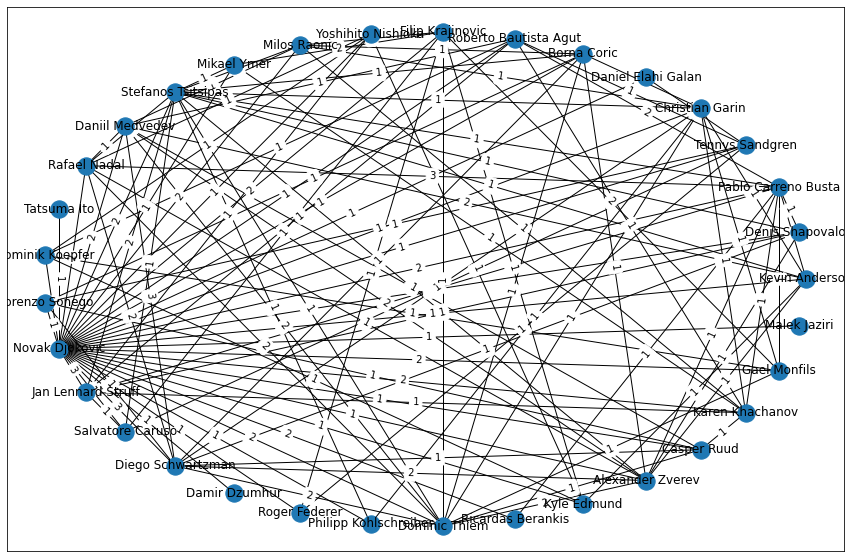

In [34]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza = nx.ego_graph(G, 'Novak Djokovic')
print(f"Čvorovi ego mreže igrača crraii su {ego_mreza.nodes}")
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza,'weight')
pos = nx.circular_layout(ego_mreza)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza, pos)
nx.draw_networkx_edge_labels(ego_mreza, pos, edge_labels = tezine_grana)

In [35]:
output_path = "models/Novak_2020.gml"

nx.write_gml(ego_mreza, output_path)

In [36]:
Ego_node_Novak = G
for i in range(len(list(ego_mreza.nodes))):
    Ego_node_Novak = nx.contracted_nodes(Ego_node_Novak, 'Novak Djokovic', list(ego_mreza.nodes)[i])

for (n, d) in Ego_node_Novak.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Novak_2020_egonode.gml"

nx.write_gml(Ego_node_Novak, output_path)

### Rafael Nadal

In [31]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_nadal = nx.ego_graph(G, 'Rafael Nadal')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza_nadal,'weight')
pos = nx.circular_layout(ego_mreza_nadal)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
#nx.draw_networkx(ego_mreza, pos)
#nx.draw_networkx_edge_labels(ego_mreza_nadal, pos, edge_labels = tezine_grana)

<Figure size 1080x720 with 0 Axes>

In [32]:
output_path = "models/Nadal_2020.gml"

nx.write_gml(ego_mreza_nadal, output_path)

In [33]:
Ego_node_Nadal = G
for i in range(len(list(ego_mreza_nadal.nodes))):
    Ego_node_Nadal = nx.contracted_nodes(Ego_node_Nadal, 'Rafael Nadal', list(ego_mreza_nadal.nodes)[i])

for (n, d) in Ego_node_Nadal.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Nadal_2020_egonode.gml"

nx.write_gml(Ego_node_Nadal, output_path)

### Roger Federer

C:\Users\Djole\Anaconda3\lib\site-packages\networkx\drawing\nx_pylab.py:579: MatplotlibDeprecationWarning: 
The iterable function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use np.iterable instead.
  if not cb.iterable(width):


{('Novak Djokovic',
  'Roger Federer'): Text(0.8117448437619674, -0.39091579256102543, '1'),
 ('Novak Djokovic',
  'Tennys Sandgren'): Text(0.04951559945049633, -0.2169418641428812, '1'),
 ('Novak Djokovic',
  'Filip Krajinovic'): Text(0.8117449033666108, 0.3909157499862803, '2'),
 ('Filip Krajinovic',
  'Roger Federer'): Text(0.6234897471285783, -5.108969419742593e-08, '1'),
 ('Filip Krajinovic',
  'Marton Fucsovics'): Text(0.20048441545066453, -0.09654818867236742, '1'),
 ('Filip Krajinovic',
  'Steve Johnson'): Text(0.20048444525298617, 0.878379688644928, '1'),
 ('Steve Johnson',
  'Roger Federer'): Text(0.2004843856483429, 0.0965481460976223, '1'),
 ('Steve Johnson',
  'Tennys Sandgren'): Text(-0.5617448586631283, 0.2705220745157666, '1'),
 ('John Millman',
  'Roger Federer'): Text(-0.1387395567875362, -0.1739738901008736, '1'),
 ('Tennys Sandgren',
  'Roger Federer'): Text(-0.1387395567875362, -0.6078576652188556, '1'),
 ('Marton Fucsovics',
  'Roger Federer'): Text(0.200484355846

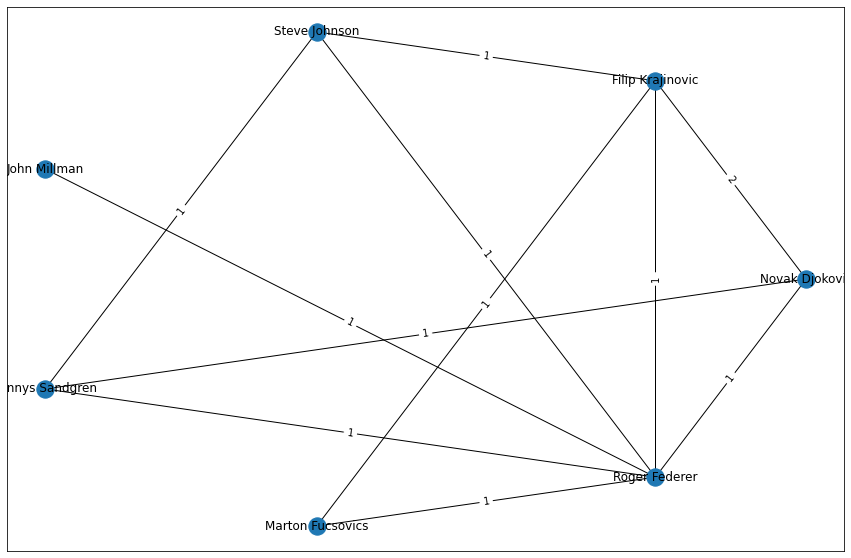

In [28]:
# možemo iskoristiti networkx.draw_network da predstavimo egomrežu tog čvora
ego_mreza_roger = nx.ego_graph(G, 'Roger Federer')
plt.figure(figsize=(15,10))
tezine_grana = nx.get_edge_attributes(ego_mreza_roger,'weight')
pos = nx.circular_layout(ego_mreza_roger)
#pos = nx.spring_layout(ego_mreza)
#print(pos)
nx.draw_networkx(ego_mreza_roger, pos)
nx.draw_networkx_edge_labels(ego_mreza_roger, pos, edge_labels = tezine_grana)

In [29]:
output_path = "models/Roger_2020.gml"

nx.write_gml(ego_mreza_roger, output_path)

In [30]:
Ego_node_Roger = G
for i in range(len(list(ego_mreza_roger.nodes))):
    Ego_node_Roger = nx.contracted_nodes(Ego_node_Roger, 'Roger Federer', list(ego_mreza_roger.nodes)[i])

for (n, d) in Ego_node_Roger.nodes(data=True):
    if('contraction' in d):
        del d['contraction']

        
output_path = "models/Roger_2020_egonode.gml"

nx.write_gml(Ego_node_Roger, output_path)

### Distribucija

In [21]:
#25
list_tournament = set(data['tourney_name'].unique())

In [22]:
list_surface = []
for i in list_tournament:
    print(i)
    result = data[(data['tourney_name'] == i)]['surface']
    list_surface.append((result.iloc[-1]))
    print(list_surface)

Davis Cup QLS R1: GER vs BLR
['Hard']
Dubai
['Hard', 'Hard']
Kitzbuhel
['Hard', 'Hard', 'Clay']
Cologne 2
['Hard', 'Hard', 'Clay', 'Hard']
Montpellier
['Hard', 'Hard', 'Clay', 'Hard', 'Hard']
New York
['Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard']
Davis Cup WG1 PO: LBN vs THA
['Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay']
Delray Beach
['Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard']
Marseille
['Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard']
Davis Cup WG2 PO: MAR vs VIE
['Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Clay']
Davis Cup WG1 PO: VEN vs NZL
['Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Clay', 'Hard']
Davis Cup WG2 PO: PHI vs GRE
['Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Clay']
Davis Cup WG1 PO: BIH vs RSA
['Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Hard', 'Clay', 'Hard', 'Hard', 'Clay', 'Hard', 'Clay', 'Hard']
Atp Cup
['Hard'

In [23]:
d = {'name': list(list_tournament), 'surface': list_surface}
df = pd.DataFrame(data=d)

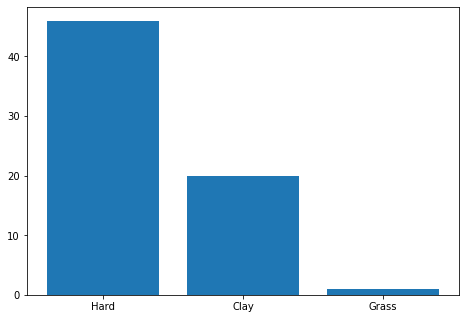

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = ['Hard', 'Clay', 'Grass']
value = [df[(df['surface'] == 'Hard')].count().surface,df[(df['surface'] == 'Clay')].count().surface,df[(df['surface'] == 'Grass')].count().surface]
ax.bar(name, value)
plt.show()

In [27]:
df[(df['surface'] == 'Hard')].count().surface

46

In [50]:
#26
dd = {'Matches': data['tourney_name'], 'surface': data['surface']}
dff = pd.DataFrame(data=dd)

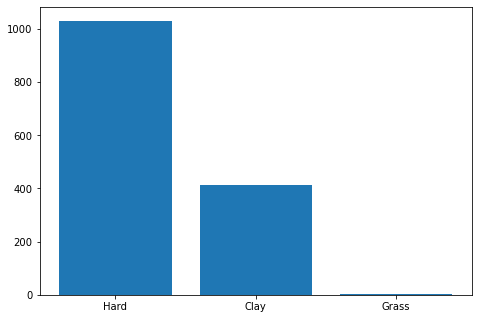

In [51]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
name = ['Hard', 'Clay', 'Grass']
value = [dff[(dff['surface'] == 'Hard')].count().surface,dff[(dff['surface'] == 'Clay')].count().surface,dff[(dff['surface'] == 'Grass')].count().surface]
ax.bar(name, value)
plt.show()

In [56]:
dff[(dff['surface'] == 'Hard')].count().surface

1031

### Centralnost mreze

In [37]:
C_star = (G.number_of_nodes()-1)*(G.number_of_nodes()-1)
C_graph = 0
for i in range(G.number_of_nodes()):
    C_graph += max(list(G.degree), key=lambda x: x[1])[1] - list(G.degree)[i][1]
Cen = C_graph/C_star
Cen

0.1029695105462412

### Mreza Velike trojke

In [38]:
VT = G.copy()
for node in list(G.nodes):
    if not G.has_edge(node, 'Novak Djokovic') and not G.has_edge(node, 'Rafael Nadal') and not G.has_edge(node, 'Roger Federer'):
        print(node)
        VT.remove_node(node)

Finn Tearney
Phuong Van Nguyen
Nicolas Alvarez
Luis David Martinez
Michail Pervolarakis
Timofey Skatov
Francisco Cerundolo
Sumit Nagal
Nicolas Jarry
Christopher Eubanks
Sharmal Dissanayake
Thehan Sanjaya Wijemanne
Nino Serdarusic
Albert Ramos
Cedrik Marcel Stebe
Kristjan Tamm
Cem Ilkel
Felipe Meligeni Rodrigues Alves
Mirza Basic
Franz Luna Lavidalie
Reilly Opelka
Jaume Munar
Jurij Rodionov
Juan Ignacio Londero
Robin Haase
James Duckworth
Jordi Munoz Abreu
Pak Long Yeung
Marco Trungelliti
Denis Kudla
John Patrick Smith
Tallon Griekspoor
Ruan Roelofse
Fabio Fognini
Mikhail Kukushkin
Bradley Klahn
Bernard Tomic
Go Soeda
Benjamin Hassan
Stan Wawrinka
Marc Andrea Huesler
Kacper Zuk
Fernando Verdasco
Noah Rubin
Yuichi Sugita
Lukas Hellum Lilleengen
Denis Istomin
Otto Virtanen
Maxime Janvier
Aleksandar Vukic
Linh Giang Trinh
Maxime Cressy
Arthur Rinderknech
Holger Rune
Peter Gojowczyk
Pedro Martinez
Ivo Karlovic
Gianluca Mager
Daniel Evans
Alexander Donski
Facundo Diaz Acosta
Norbert Gombos
B

In [39]:
print(nx.info(VT))
print(nx.info(G))
proc = VT.number_of_nodes()/G.number_of_nodes()
proc

Name: 
Type: Graph
Number of nodes: 57
Number of edges: 297
Average degree:  10.4211
Name: 
Type: Graph
Number of nodes: 345
Number of edges: 1325
Average degree:   7.6812


0.16521739130434782